In [1]:
import tensorflow as tf
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2.3.0


In [2]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-09-03 16:05:40--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-09-03 16:05:40 (38.0 MB/s) - ‘moore.csv’ saved [2302/2302]



In [67]:
data = pd.read_csv("moore.csv", header=None).values

In [68]:
data.shape

(162, 2)

In [69]:
X = data[:,0].reshape(-1,1)

In [70]:
X.shape

(162, 1)

In [71]:
Y = data[:,1]

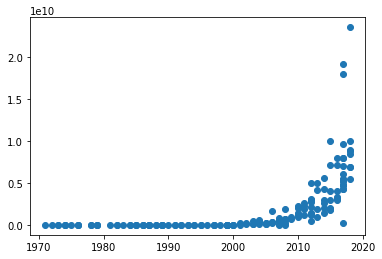

In [72]:
plt.scatter(X,Y)

In [73]:
Y = np.log(Y)

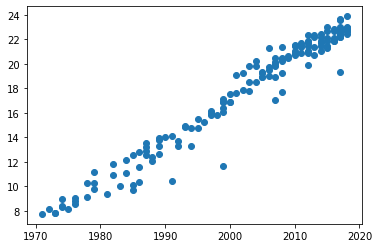

In [74]:
plt.scatter(X,Y)

In [75]:
X = X - X.mean()

In [76]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss="mse")

In [77]:
def schedule(epoch, lr):
  if epoch>=50:
    return 0.0001
  return 0.001

In [78]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [79]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 490.6168
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 326.6047
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 318.8698
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 246.7030
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 168.7794
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 111.1408
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 100.1340
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 63.7867
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 47.4187
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 36.8897
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 25.4964
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 27.2548
Epoch 13/200
6/6 [========================

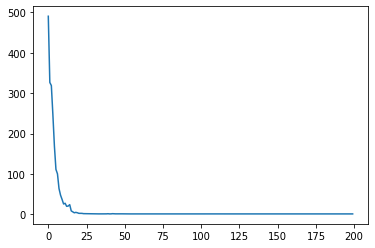

In [80]:
plt.plot(r.history["loss"])

In [82]:
model.layers[0].get_weights()

[array([[0.34638363]], dtype=float32), array([17.758066], dtype=float32)]

In [83]:
a = model.layers[0].get_weights()[0][0,0]

In [84]:
print("Time to double:", np.log(2) / a)

Time to double: 2.0010968130907214
